In [72]:
!pip install pandas
import pandas as pd

In [73]:
import numpy as np

In [74]:
import matplotlib.pyplot as plt

In [75]:
!pip install tensorflow 
import tensorflow as tf

In [76]:
!pip install flask

In [77]:
!pip install keras
import keras as k

In [78]:
dataset=pd.read_csv("Crude Oil Prices Daily.csv")

In [79]:
dataset.head()

,Date,Closing Value
0,02-01-1986,25.56
1,03-01-1986,26.00
2,06-01-1986,26.53
3,07-01-1986,25.85
4,08-01-1986,25.87


In [80]:
dataset.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [81]:
dataset.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [82]:
dataset.dropna(axis=0,inplace=True)

In [83]:
dataset.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [84]:
dataoil=dataset.reset_index()['Closing Value']
dataoil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataoil=scaler.fit_transform(np.array(dataoil).reshape(-1,1))
dataoil

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

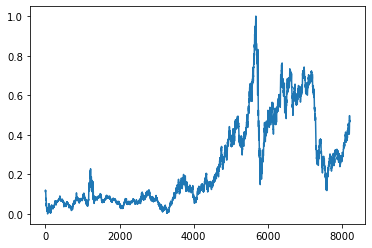

In [86]:
plt.plot(dataoil)

In [87]:
training_size=int(len(dataoil)*0.65)
test_size=len(dataoil)-training_size
train_data,test_data=dataoil[0:training_size,:],dataoil[training_size:len(dataoil),:1]

In [88]:
training_size,test_size

(5340, 2876)

In [89]:
train_data.shape

(5340, 1)

In [90]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
        return np.array(dataX),np.array(dataY)

In [91]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [92]:
print(x_train.shape),print(y_train.shape)

(1, 10)
(1,)


(None, None)

In [93]:
print(x_test.shape),print(y_test.shape)

(1, 10)
(1,)


(None, None)

In [94]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, 0.11550422, 0.1156523 ,
        0.11683696, 0.1140234 , 0.10980305, 0.1089886 , 0.11054346]])

In [95]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

# MODEL BUILDING

## IMPORTING MODEL BUILDING LIBRARIES

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_absolute_error

## INITIALIZING THE MODEL

In [112]:
model=Sequential()

## ADDING LSTM LAYERS 

In [113]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))


## adding output layers

In [114]:
model.add(Dense(1))

In [115]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 10, 50)            10400     
                                                                 
 lstm_19 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## configure the learning process 

In [116]:
model.compile(loss='mean_squared_error',optimizer='adam')

## train the model

In [117]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.0089 - val_loss: 0.0859
Epoch 2/50
1/1 [==============================] - 0s 51ms/step - loss: 0.0056 - val_loss: 0.0681
Epoch 3/50
1/1 [==============================] - 0s 44ms/step - loss: 0.0029 - val_loss: 0.0506
Epoch 4/50
1/1 [==============================] - 0s 46ms/step - loss: 8.8476e-04 - val_loss: 0.0343
Epoch 5/50
1/1 [==============================] - 0s 48ms/step - loss: 1.1931e-05 - val_loss: 0.0212
Epoch 6/50
1/1 [==============================] - 0s 53ms/step - loss: 5.1180e-04 - val_loss: 0.0148
Epoch 7/50
1/1 [==============================] - 0s 47ms/step - loss: 0.0015 - val_loss: 0.0141
Epoch 8/50
1/1 [==============================] - 0s 48ms/step - loss: 0.0017 - val_loss: 0.0165
Epoch 9/50
1/1 [==============================] - 0s 52ms/step - loss: 0.0013 - val_loss: 0.0208
Epoch 10/50
1/1 [==============================] - 0s 49ms/step - loss: 6.6404e-04 - val_loss: 0.0262
Epoch 11/50
1/1

## Model Evaluation

In [118]:
regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))


regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)
history =regressor.fit(x_train, y_train, epochs = 20, batch_size = 15,validation_data=(x_test, y_test), callbacks=[reduce_lr],shuffle=False)

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 0.0110 - val_loss: 0.1083 - lr: 0.0010
Epoch 2/20
1/1 [==============================] - 0s 53ms/step - loss: 0.0073 - val_loss: 0.0863 - lr: 0.0010
Epoch 3/20
1/1 [==============================] - 0s 52ms/step - loss: 0.0039 - val_loss: 0.0660 - lr: 0.0010
Epoch 4/20
1/1 [==============================] - 0s 50ms/step - loss: 0.0017 - val_loss: 0.0473 - lr: 0.0010
Epoch 5/20
1/1 [==============================] - 0s 52ms/step - loss: 5.7395e-04 - val_loss: 0.0307 - lr: 0.0010
Epoch 6/20
1/1 [==============================] - 0s 53ms/step - loss: 2.6244e-04 - val_loss: 0.0204 - lr: 0.0010
Epoch 7/20
1/1 [==============================] - 0s 48ms/step - loss: 9.9683e-04 - val_loss: 0.0163 - lr: 0.0010
Epoch 8/20
1/1 [==============================] - 0s 43ms/step - loss: 0.0025 - val_loss: 0.0174 - lr: 0.0010
Epoch 9/20
1/1 [==============================] - 0s 62ms/step - loss: 0.0018 - val_loss: 0.0212 - lr: 0.0010


In [120]:
train_predict = regressor.predict(x_train)
test_predict = regressor.predict(x_test)


1/1 [==============================] - 0s 20ms/step


In [122]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [123]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.31269309997558636

In [125]:
from tensorflow.keras.models import load_model
model.save("crude_oil.h5")

In [129]:
look_back=10
trainPredictPlot=np.empty_like(dataoil)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=np.empty_like(dataoil)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dataoil)-1,:]=test_predict

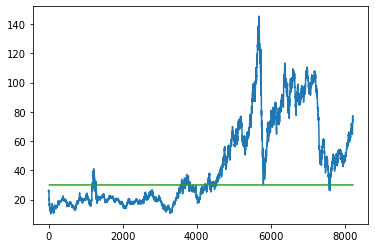

In [130]:
plt.plot(scaler.inverse_transform(dataoil))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [131]:
len(test_data)

2876

In [138]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [139]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [140]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [142]:
lst_output=[]
n_steps=10
i=0 
while(i<10):
    if(len(temp_input)>10):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.16928944]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.16928944]
1 day output [[0.16845967]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.16928944 0.16845967]
2 day output [[0.1652108]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.16928944 0.16845967 0.1652108 ]
3 day output [[0.16010278]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.16928944 0.16845967 0.1652108  0.16010278]
4 day output [[0.15425318]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.16928944
 0.16845967 0.1652108  0.16010278 0.15425318]
5 day output [[0.14744194]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.16928944 0.16845967
 0.1652108  0.16010278 0.15425318 0.14744194]
6 day output [[0.14018959]]
7 day input [0.46497853 0.47038353 0.47149415 0.16928944 0.16845967

In [143]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)
len(dataoil)


8216

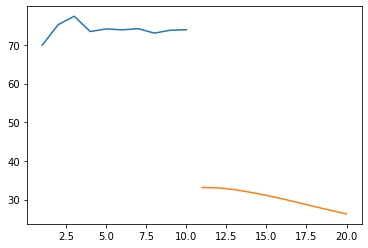

In [145]:
plt.plot(day_new,scaler.inverse_transform(dataoil[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

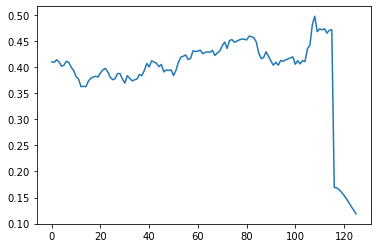

In [146]:
df3=dataoil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

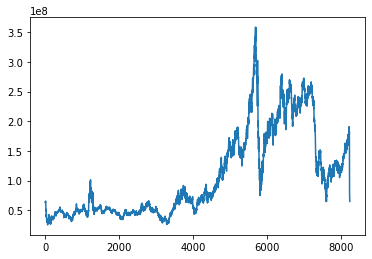

In [150]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)